![](img.webp)

In [55]:
#importing libraries:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from warnings import filterwarnings 
filterwarnings('ignore')



# Attribute Information:
![alt](img1.png)
![alt](img2.png)

In [56]:
#importing dataset:

dt=pd.read_csv('Breast-Cancer.csv')
df=dt.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [57]:
#Data Wrangling:

#feature manipulation:
df=df.rename(columns={'diagnosis':'target'})

#data cleaning:

df.drop(['Unnamed: 32','id'],inplace=True,axis=1)

#encoding categorical data:

le=LabelEncoder()
df["target"]=le.fit_transform(df["target"])
df.head()


print(df.target.value_counts())

0    357
1    212
Name: target, dtype: int64


In [58]:
#EDA: Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [59]:
df.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 2000x1000 with 0 Axes>

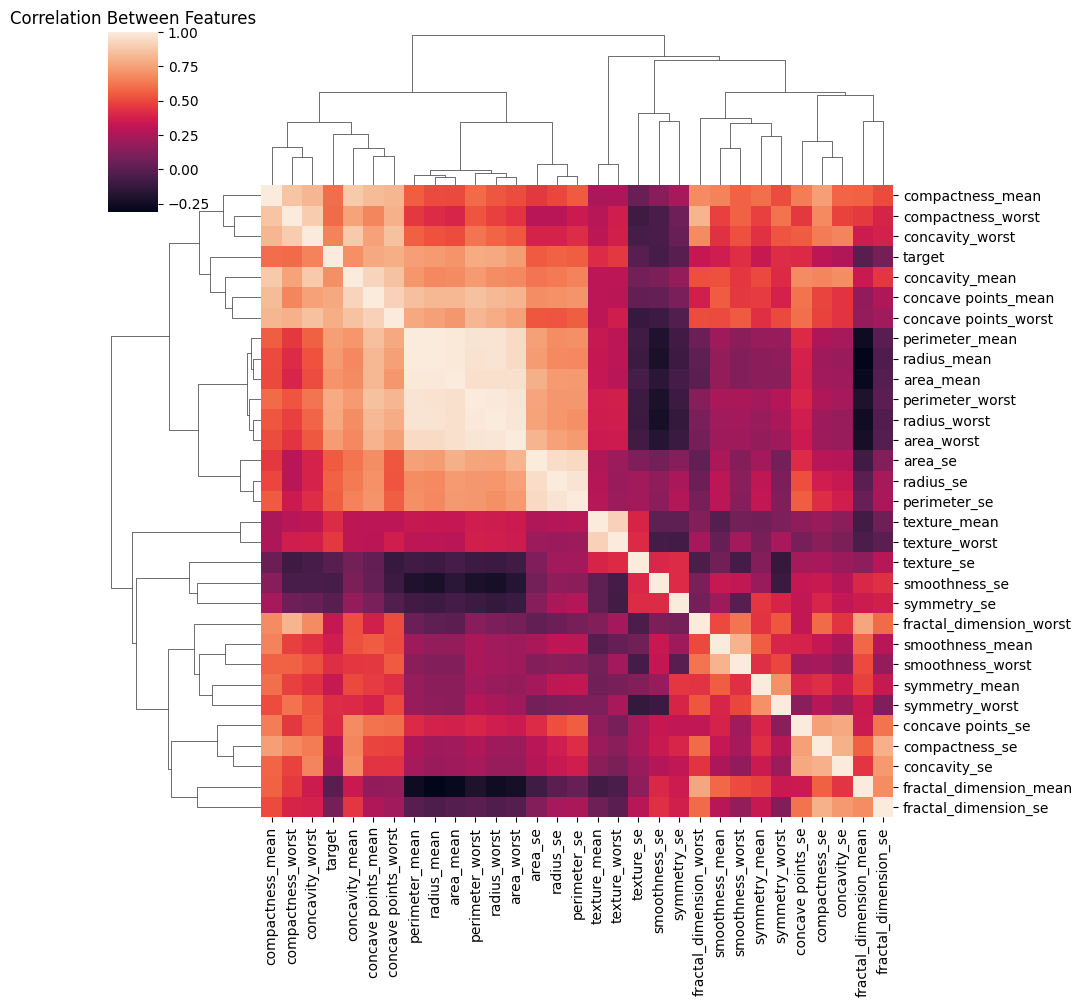

In [60]:
#correlation matrix:

corr=df.corr()
plt.figure(figsize=(20,10))
sns.clustermap(corr,fmt=".2f")
plt.title("Correlation Between Features")



Text(0.5, 1.0, 'Correlation Between Features with Corr Threshold 0.75')

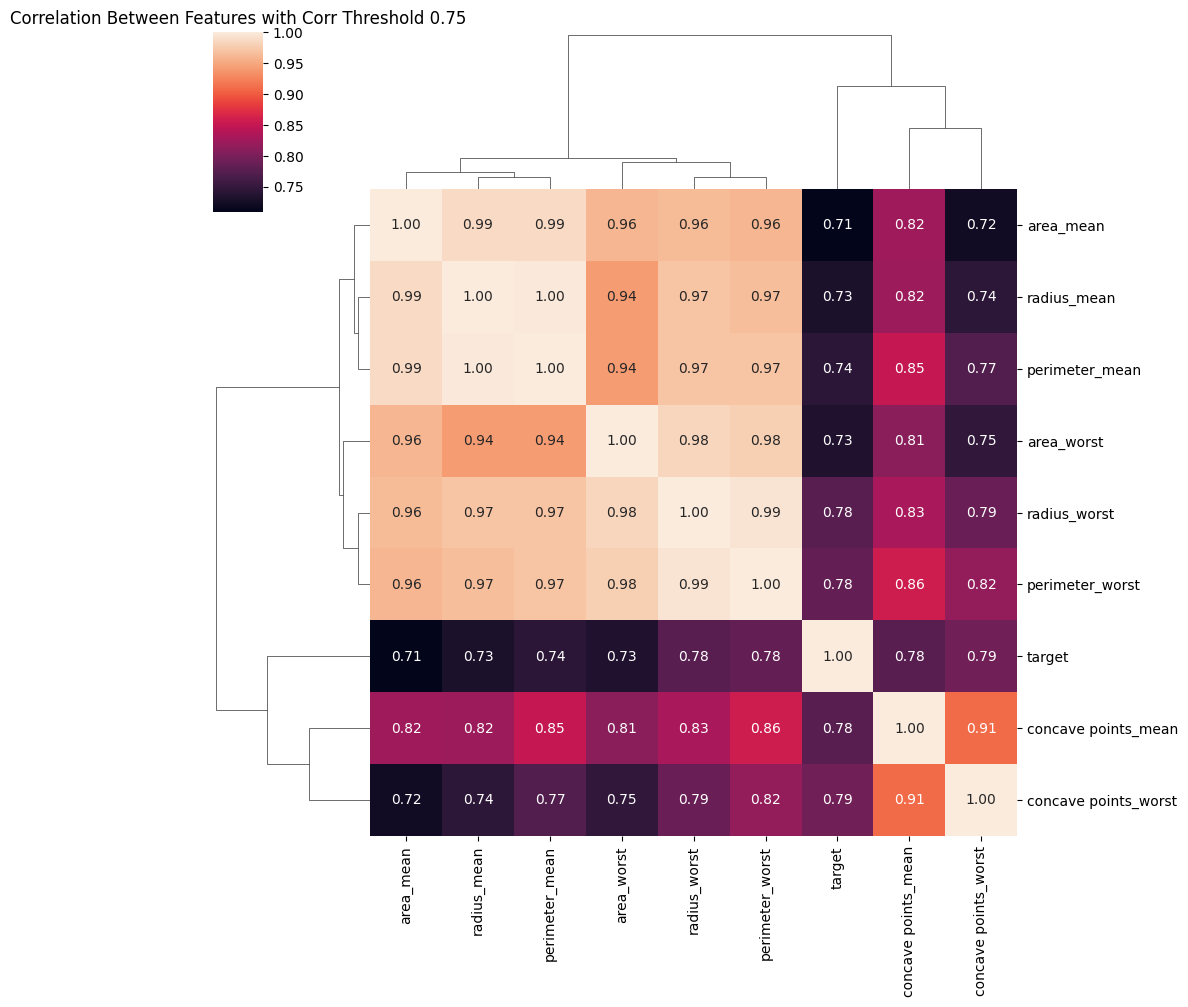

In [61]:
#Correlation Between Features with Corr Threshold 0.75
threshold=0.70
filtre=np.abs(corr["target"])>threshold
corr_features=corr.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Correlation Between Features with Corr Threshold 0.75")

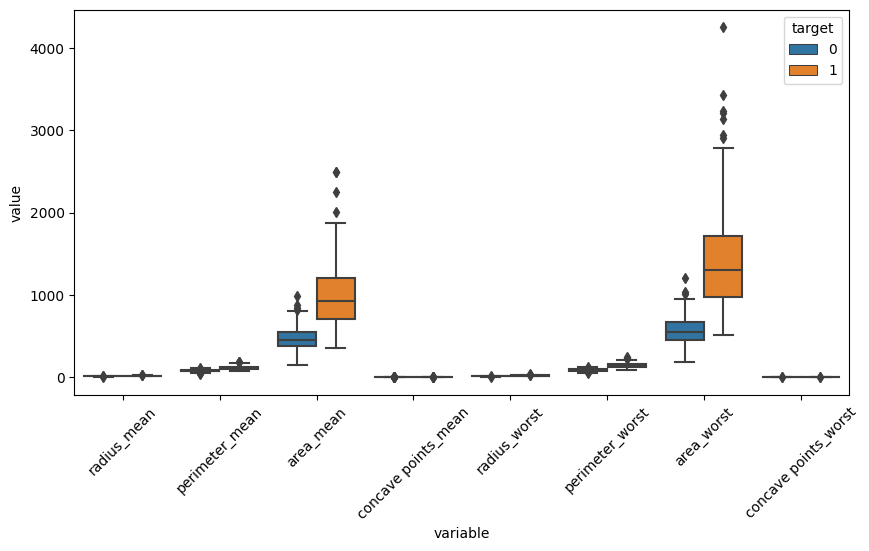

In [62]:
#melting data for better visualization:

data_melted=pd.melt(df,id_vars="target", 
                    value_name="value",
                    value_vars=corr_features)
plt.figure(figsize=(10,5))
sns.boxplot(x="variable",y="value",hue="target",data=data_melted)
plt.xticks(rotation=45)
plt.show()

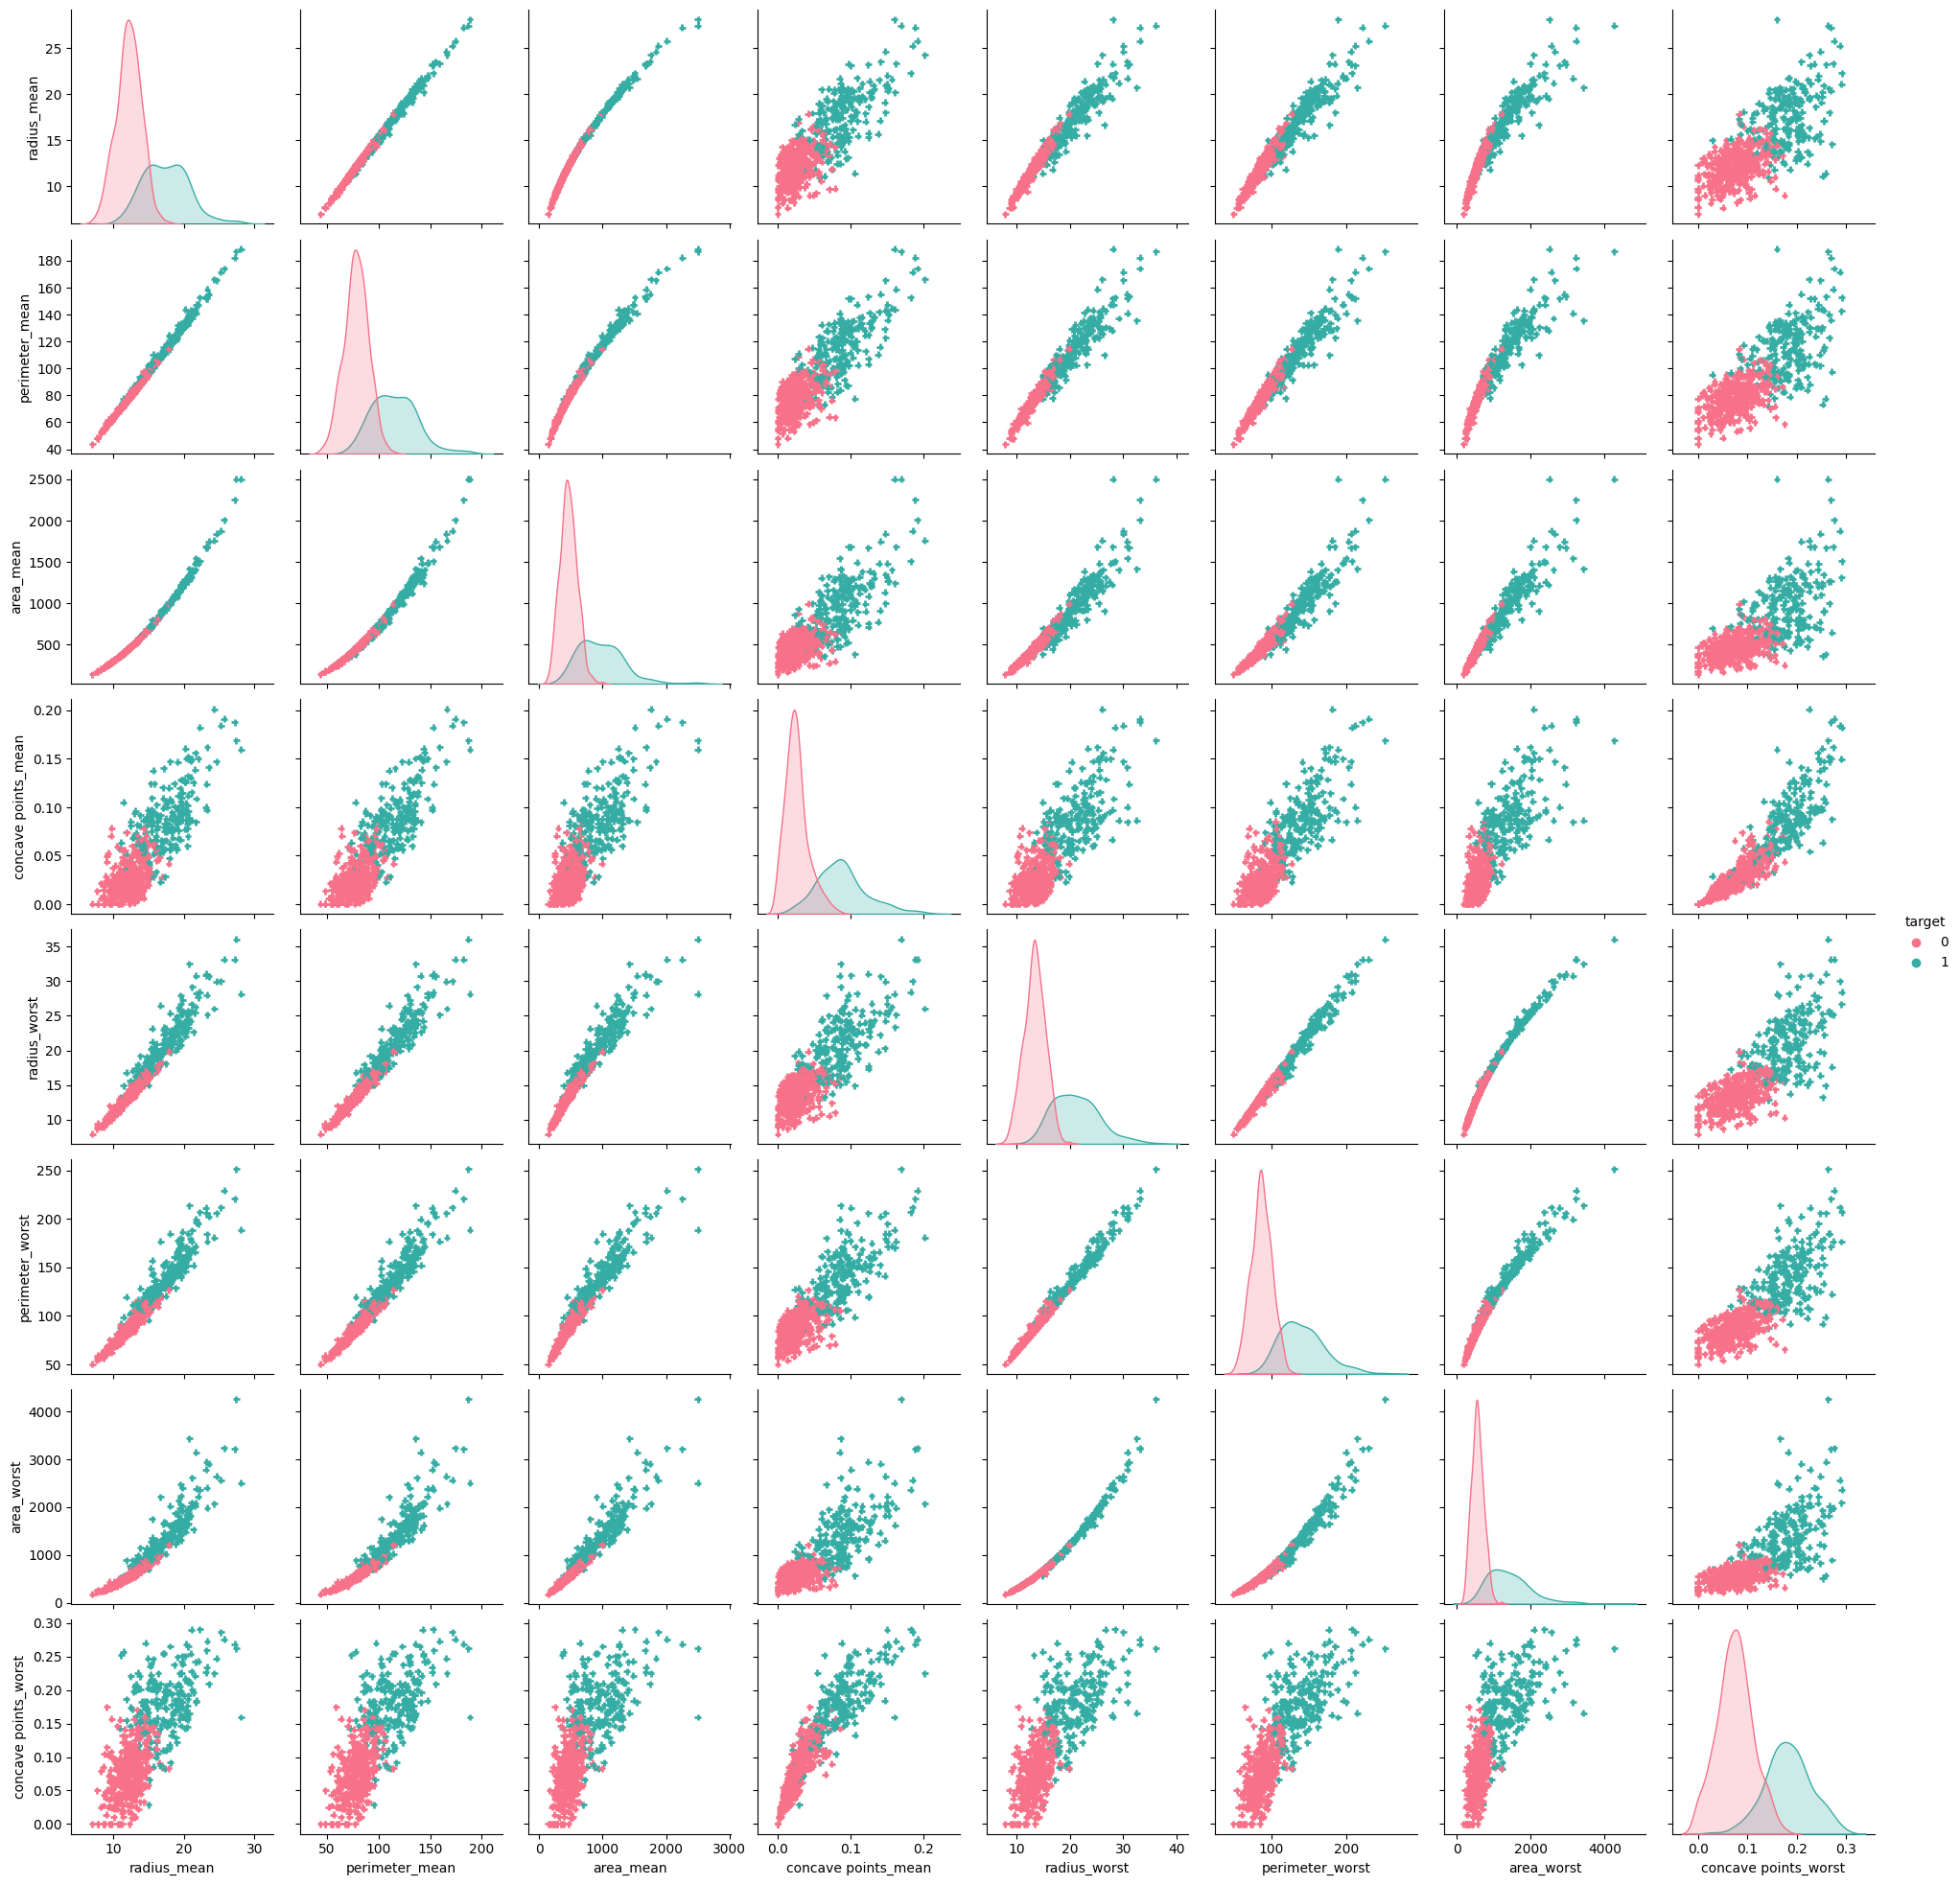

In [63]:
# pair plot for understanding the relationship  and distribution between features:
sns.pairplot(df[corr_features],diag_kind="kde",markers="+",hue="target",palette="husl",
             plot_kws=dict(s=25, edgecolor="b", linewidth=2))



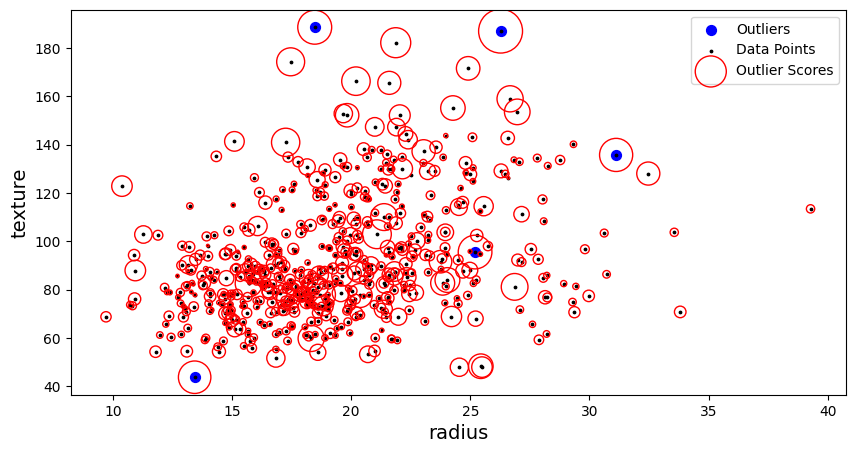

In [64]:
# Outlier Detection:

#Outlier Detection with Local Outlier Factor(LOF):

y=df.target
X=df.drop(["target"],axis=1)
columns=X.columns.tolist()


lcf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)

y_pred=lcf.fit_predict(X)  
y_pred[0:10] # -1: outlier, 1: inlier

X_score=lcf.negative_outlier_factor_ #outlier scores

outlier_score=pd.DataFrame()
outlier_score["score"]=X_score

threshold=-2
filtre=outlier_score["score"]<threshold # the outliers whose scores are less than the threshold value
                                        
outlier_index=outlier_score[filtre].index.tolist() #index of the outliers


#visualization of the outliers:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.scatter(X.iloc[outlier_index,1],X.iloc[outlier_index,2],color="blue",s=50,label="Outliers")
plt.scatter(X.iloc[:,1],X.iloc[:,2],color="k",s=3,label="Data Points")

radius=(X_score.max()-X_score)/(X_score.max()-X_score.min()) #radius of the outliers
outlier_score["radius"]=radius
plt.scatter(X.iloc[:,1],X.iloc[:,2],s=1000*radius,edgecolors="r",facecolors="none",label="Outlier Scores")
plt.xlabel("radius",fontsize=14)
plt.ylabel("texture",fontsize=14)
plt.legend()
plt.show()

#drop outliers:
X=X.drop(outlier_index)
y=y.drop(outlier_index).values #values: array'e çevirir.





In [65]:
#Train Test Split:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

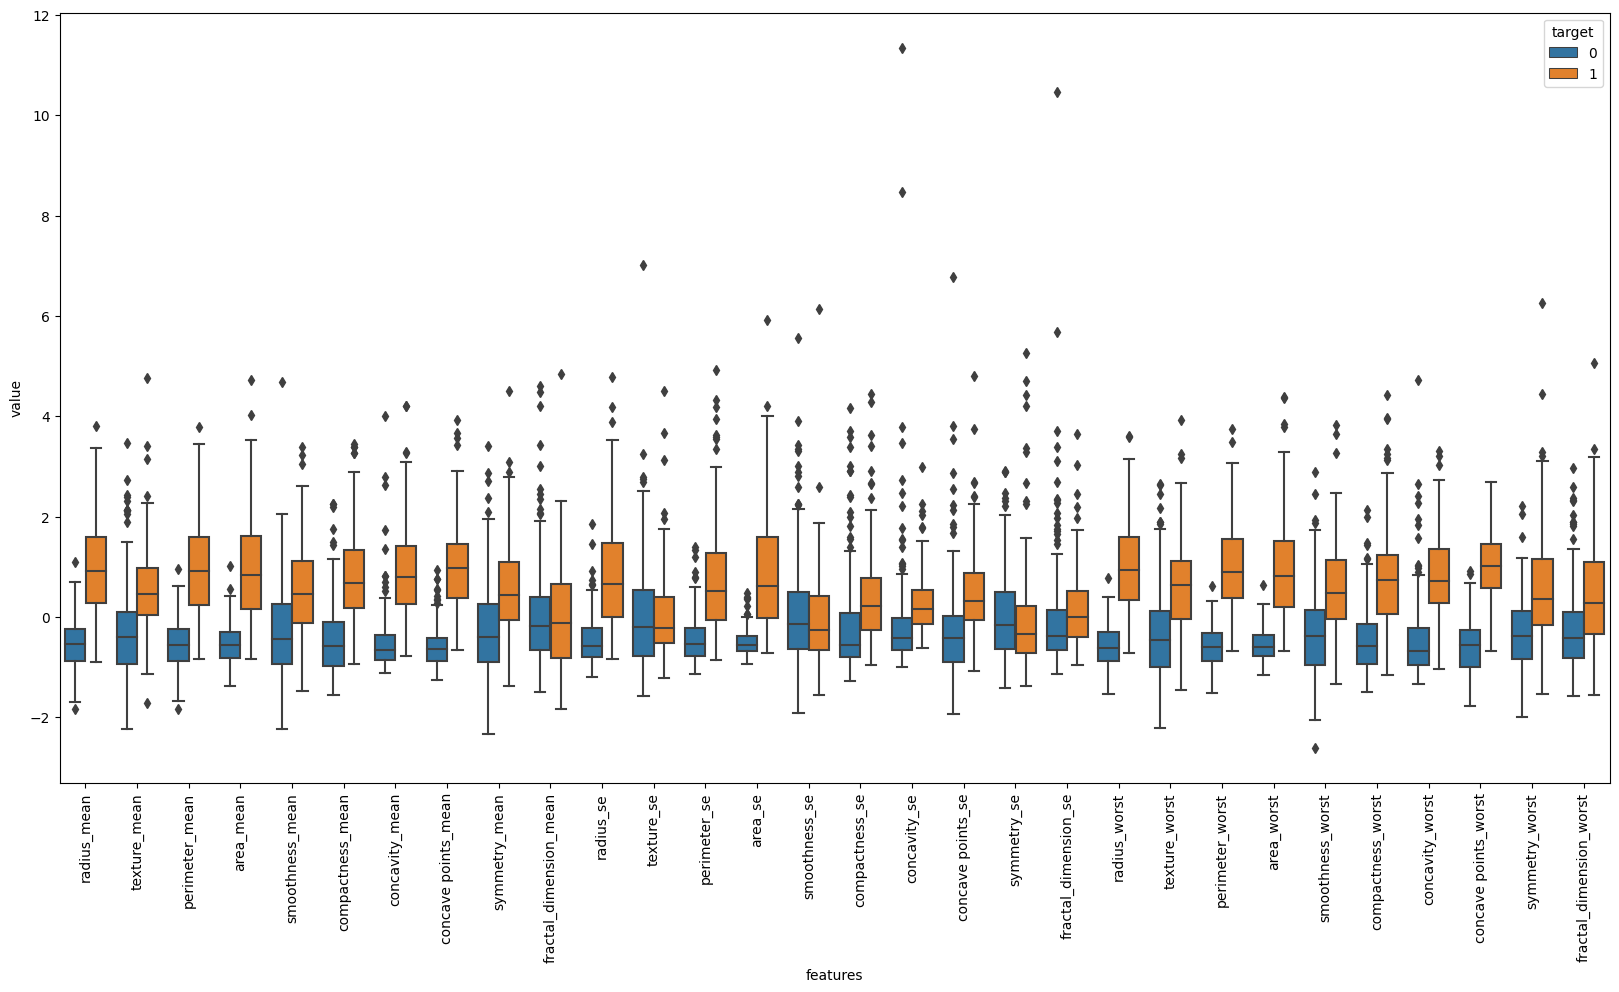

In [66]:
#Standardization:

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# converting array train set to dataframe
X_train_df=pd.DataFrame(X_train,columns=columns) 

#visualization of standardized data:
X_train_df["target"]=y_train
data_melted=pd.melt(X_train_df,id_vars="target",
                    var_name="features", 
                    value_name="value")

plt.figure(figsize=(20,10))
sns.boxplot(x="features",y="value",hue="target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

In [67]:
#KNN Classification:

#build model:

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

#prediction:
y_pred=knn.predict(X_test)

print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))

px.imshow(confusion_matrix(y_test,y_pred),color_continuous_scale="Blues")

accuracy score: 0.9588235294117647
confusion matrix:
 [[106   1]
 [  6  57]]


In [68]:
#Model tuning:

# easy way:
knn_params={"n_neighbors":np.arange(1,50),
            "metric":["euclidean","manhattan"],
            "leaf_size":[10,20,30,40,50],
            "weights":["uniform","distance"]}

#knn parametres:
#n_neighbors: komşu sayısı
#metric: distance metric
#leaf_size: leaf size
#weights: uniform, distance
#uniform: tüm komşular aynı ağırlığa sahip
#distance: komşuların ağırlığı uzaklığa göre değişir.


grd=GridSearchCV(knn,knn_params,cv=10,n_jobs=-1,verbose=2)
grd.fit(X_train,y_train)

grd.best_params_

Fitting 10 folds for each of 980 candidates, totalling 9800 fits


{'leaf_size': 10,
 'metric': 'manhattan',
 'n_neighbors': 9,
 'weights': 'uniform'}

In [69]:
#final model:
knn_tuned=KNeighborsClassifier(leaf_size=10,metric="manhattan",n_neighbors=9,weights="uniform")
knn_tuned.fit(X_train,y_train)

y_pred=knn_tuned.predict(X_test)

print("accuracy score:",accuracy_score(y_test,y_pred))

accuracy score: 0.9470588235294117


In [70]:
#Model tuning:

def KNN_Best_Params(X_train,X_test,y_train,y_test):
    
    k_range=list(range(1,31))
    weight_options=["uniform","distance"]
    param_grid=dict(n_neighbors=k_range,weights=weight_options)
    
    knn=KNeighborsClassifier()
    grid=GridSearchCV(knn,param_grid,cv=10,scoring="accuracy",n_jobs=-1,verbose=2)
    grid.fit(X_train,y_train)
    
    print("Best training score:{} with parameters:{}".format(grid.best_score_,grid.best_params_))
    
    knn=KNeighborsClassifier(**grid.best_params_) # building the model with the best parameters
    knn.fit(X_train,y_train)
    
    # checking overfitting:
    y_pred_test=knn.predict(X_test)
    y_pred_train=knn.predict(X_train)
    
    cm_test=confusion_matrix(y_test,y_pred_test)
    cm_train=confusion_matrix(y_train,y_pred_train)
    
    acc_test=accuracy_score(y_test,y_pred_test)
    acc_train=accuracy_score(y_train,y_pred_train)
    
    print("Test Score:{} Train Score:{}".format(acc_test,acc_train))
    print("CM Test:\n",cm_test)
    print("CM Train:\n",cm_train)
    
    return grid
    
    
grid=KNN_Best_Params(X_train,X_test,y_train,y_test)


Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best training score:0.9692948717948718 with parameters:{'n_neighbors': 4, 'weights': 'distance'}
Test Score:0.9470588235294117 Train Score:1.0
CM Test:
 [[104   3]
 [  6  57]]
CM Train:
 [[249   0]
 [  0 145]]


<Axes: xlabel='p1', ylabel='p2'>

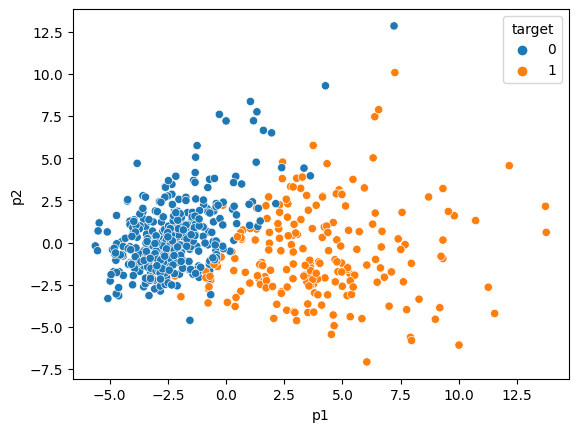

In [71]:
# There is overfitting problem. We can use PCA to reduce the dimension of the data.

# Dimension reduction with PCA: Principal Component Analysis


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc=StandardScaler()
X_scaled=sc.fit_transform(X)

pca=PCA(n_components=2) #2 componentli bir pca modeli oluşturduk.
X_reduced=pca.fit_transform(X_scaled)

#visualization of reduced data:
pca_data=pd.DataFrame(X_reduced,columns=["p1","p2"])
pca_data["target"]=y
sns.scatterplot(x="p1",y="p2",hue="target",data=pca_data)


In [72]:
#building model with reduced data:

X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=42)

#model tuning on reduced data:

grid=KNN_Best_Params(X_train,X_test,y_train,y_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best training score:0.9593589743589742 with parameters:{'n_neighbors': 9, 'weights': 'uniform'}
Test Score:0.9235294117647059 Train Score:0.9593908629441624
CM Test:
 [[102   5]
 [  8  55]]
CM Train:
 [[243   6]
 [ 10 135]]


In [73]:
# I have reduced the overfitting problem but the accuracy score is decreased. So I will use the NCA
# method to increase the accuracy score.

Text(0.5, 1.0, 'NCA:Neighbourhood Component Analysis')

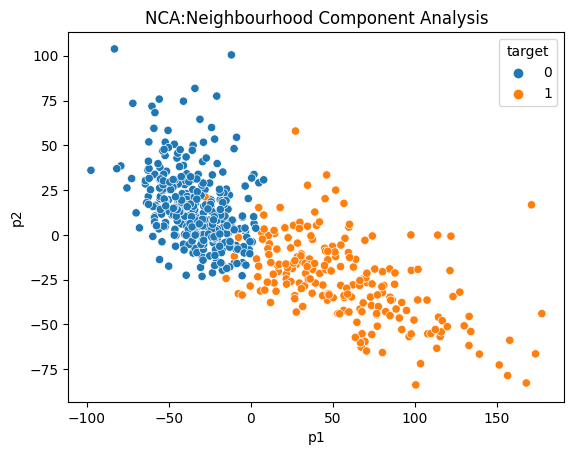

In [75]:
#NCA: Neighbourhood Component Analysis

#scaling data:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

#NCA:
nca=NeighborhoodComponentsAnalysis(n_components=2,random_state=42)
nca.fit(X_scaled,y)
X_reduced_nca=nca.transform(X_scaled)

nca_data=pd.DataFrame(X_reduced_nca,columns=["p1","p2"])
nca_data["target"]=y

sns.scatterplot(x="p1",y="p2",hue="target",data=nca_data)
plt.title("NCA:Neighbourhood Component Analysis")

In [76]:
#building model with reduced data:

X_train,X_test,y_train,y_test=train_test_split(X_reduced_nca,y,test_size=0.3,random_state=42)
grid_nca=KNN_Best_Params(X_train,X_test,y_train,y_test)

# I have increased the accuracy score with NCA method. Now model is ready to predict the new data.

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best training score:0.9949358974358974 with parameters:{'n_neighbors': 7, 'weights': 'distance'}
Test Score:0.9705882352941176 Train Score:1.0
CM Test:
 [[107   0]
 [  5  58]]
CM Train:
 [[249   0]
 [  0 145]]


Text(0.5, 1.0, 'KNN Classification')

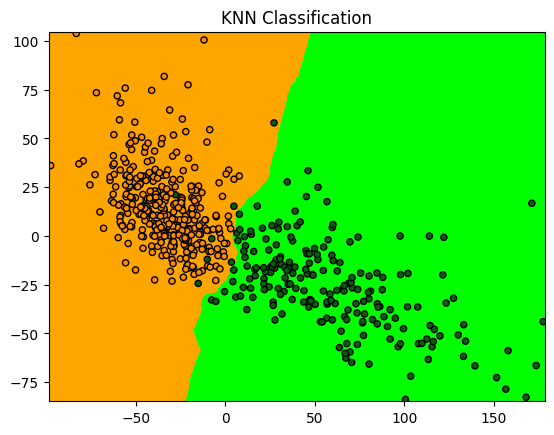

In [77]:
#visualization of decision boundary:

cmap_light=ListedColormap(["orange","cornflowerblue","lime"])
cmap_bold=ListedColormap(["darkorange","darkblue","darkgreen"])

h=0.5
X=X_reduced_nca

X_min,X_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(X_min,X_max,h),np.arange(y_min,y_max,h))

Z=grid_nca.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#plot training points:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold,edgecolor="k",s=20)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("KNN Classification")